# **Supervised Learning: Classification**

In machine learning, classification is the problem of identifying to which of a set of categories (sub-populations) a new observation belongs, based on a training set of data containing observations (or instances) whose category membership is known.
* deciding whether a received email are a spam or an organic e-mail
* assigning a diagnosis of a patient based on observed characteristics of the patient (age, blood pressure, presence or absence of certain symptoms, etc.)

# **Problem Statement:**

we will use the [Bank Marketing Dataset](https://drive.google.com/file/d/1f_B5Dc5hDnKXq0eAvjxIx4dCn5Cf_i71/view?usp=drive_link) from Kaggle to build a model to predict whether someone is going to make a deposit or not depending on some attributes.



In [1]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np

## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df_bank = pd.read_csv('https://raw.githubusercontent.com/rafiag/DTI2020/main/data/bank.csv')

# Drop 'duration' column
df_bank = df_bank.drop('duration', axis=1)

# print(df_bank.info())
print('Shape of dataframe:', df_bank.shape)
df_bank.head()

Shape of dataframe: (11162, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


## Class Distribution:

Another important thing to make sure before feeding our data into the model is the class distribution of the data. In our case where the expected class are divided into two outcome, ‘yes’ and ‘no’, a class distribution of 50:50 can be considered ideal.

In [3]:
# Target Variable: will customer deposit in bank or not?
df_bank['deposit'].value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

As we can see our class distribution is more or less similar, not exactly 50:50 distribution but still good enough.

## Missing Values:

Last thing to check before moving on is missing values. In some case our data might have missing values in some column, this can be caused some reasons such as human error.

In [4]:
# df.isna().sum()
df_bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

## Scale Numeric Data:

we will scale our numerical data to avoid outlier presence that can significantly affect our model. Using `StandardScaler()` function from sklearn we can scale each our columns that contains numerical data.

In [5]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_bank_ready = df_bank.copy()

scaler = StandardScaler()
num_cols = ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
df_bank_ready[num_cols] = scaler.fit_transform(df_bank[num_cols])

df_bank_ready.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,1.491505,admin.,married,secondary,no,0.252525,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
1,1.239676,admin.,married,secondary,no,-0.459974,no,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
2,-0.019470,technician,married,secondary,no,-0.080160,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
3,1.155733,services,married,secondary,no,0.293762,yes,no,unknown,-1.265746,may,-0.554168,-0.481184,-0.36326,unknown,yes
4,1.071790,admin.,married,tertiary,no,-0.416876,no,no,unknown,-1.265746,may,-0.186785,-0.481184,-0.36326,unknown,yes


## Encoding Categorical Data:

Same as the numerical data, we also need to pre-process our categorical data from words to number to make it easier for the computer to understands. To do this we will use `OneHotEncoder()` provided by sklearn.

In [7]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_bank_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names_out(cat_cols)

# Replace Categotical Data with Encoded Data
df_bank_ready = df_bank_ready.drop(cat_cols ,axis=1)
df_bank_ready = pd.concat([df_encoded, df_bank_ready], axis=1)

# Encode target value
df_bank_ready['deposit'] = df_bank_ready['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

print('Shape of dataframe:', df_bank_ready.shape)
df_bank_ready.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Shape of dataframe: (11162, 51)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,age,balance,day,campaign,pdays,previous,deposit
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.491505,0.252525,-1.265746,-0.554168,-0.481184,-0.36326,1
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.239676,-0.459974,-1.265746,-0.554168,-0.481184,-0.36326,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,-0.019470,-0.080160,-1.265746,-0.554168,-0.481184,-0.36326,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.155733,0.293762,-1.265746,-0.554168,-0.481184,-0.36326,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.071790,-0.416876,-1.265746,-0.186785,-0.481184,-0.36326,1


## Split Dataset for Training and Testing:

In [8]:
# Select Features X
feature = df_bank_ready.drop('deposit', axis=1)

# Select Target  Y
target = df_bank_ready['deposit']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature , target,
                                                    shuffle = True,
                                                    test_size=0.2,
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (8929, 50)
Shape of testing feature: (2233, 50)
Shape of training label: (8929,)
Shape of training label: (2233,)


## Modelling:

### K-Nearest Neighbours
K-Nearest Neighbours (KNN) classify new data by finding k-number of closest neighbour from the training data and then decide the class based on the majority of it’s neighbours. For example in the image below where k=3 majority of it’s neighbour is classified as B, but when k=7 the majority will changes to A.

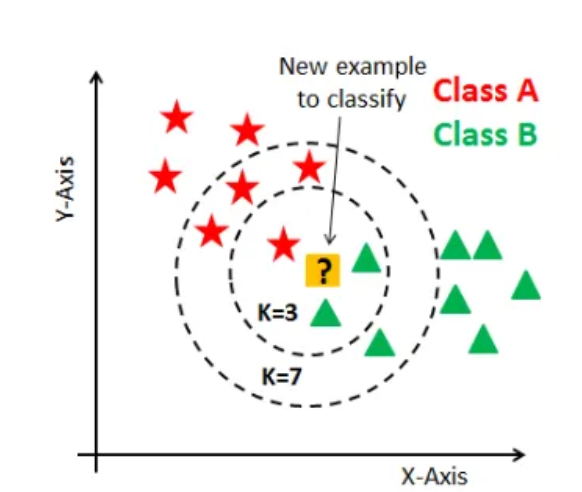

In [9]:
from sklearn.neighbors import KNeighborsClassifier

# Build the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can choose a different number for n_neighbors
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

## Evaluate the model:

To evaluate our model we will use the confusion matrix as our base for the evaluation.

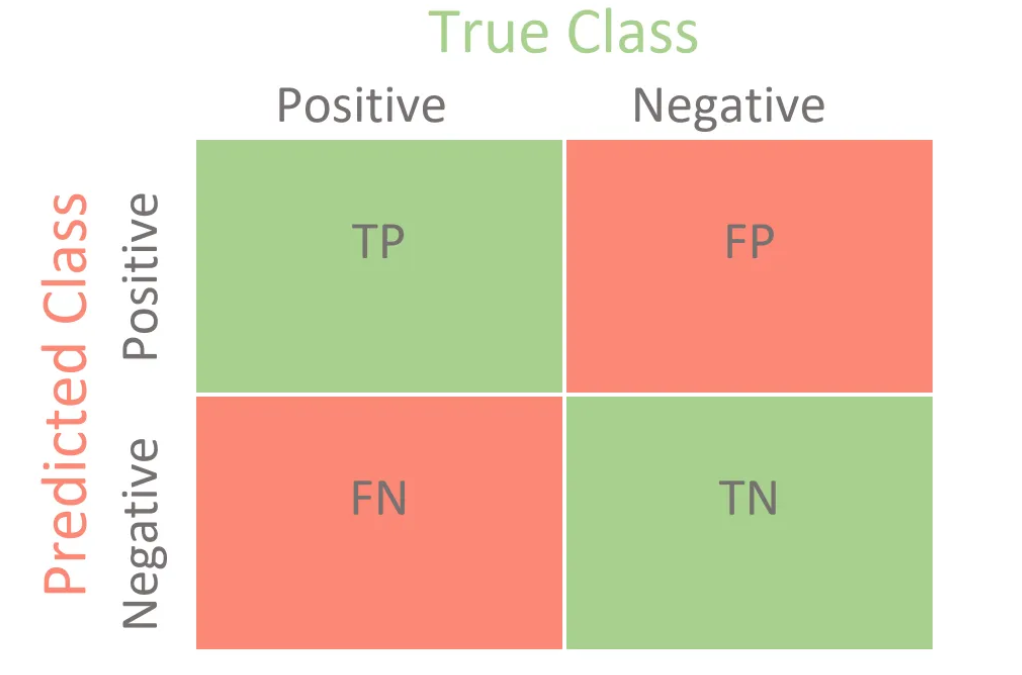

where:
- TP = True Positive;
- FP = False Positive;
- TN = True Negative;
- FN = False Negative.

The **confusion matrix** provides a summary of prediction results on a classification problem.

The number of correct and incorrect predictions are summarized with count values and broken down by each class.

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[884, 281],
       [418, 650]])

In [18]:
class_report = classification_report(y_test, y_pred)


We will use following metrics below to evaluate models:
1. Accuracy : proportion of true results among the total number of cases examined.
2. Precision: calculate how much proportion of all data that was predicted positive was actually positive
3. Recall: used to calculate how much proportion of actual positives is correctly classified.
4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.

The classification report shows the main classification metrics:

1. **Precision**: The ability of the classifier not to label as positive a sample that is negative.
    * Precision = TP / (TP + FP)

2. **Recall** (Sensitivity or True Positive Rate): The ability of the classifier to find all the positive samples.
  * Recall = TP / (TP + FN)

3. **F1-Score**: The harmonic mean of precision and recall. The F1 score reaches its best value at 1 and worst score at 0.
  * F1-Score=2⋅ (Precision*Recall) / (Precision+Recall)

4. **Support**: The number of occurrences of each class in the true labels.




In [11]:
# Generate the classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1165
           1       0.70      0.61      0.65      1068

    accuracy                           0.69      2233
   macro avg       0.69      0.68      0.68      2233
weighted avg       0.69      0.69      0.68      2233



Interpretation:

- Your model has an overall accuracy of 69%, meaning it correctly predicts the deposit status 69% of the time.
- The precision and recall for class 0 are slightly lower than for class 1, indicating that the model is slightly better at predicting class 1.
- The F1-scores suggest that the model's balance between precision and recall is moderate for both classes, but slightly better for class 0.
- The macro and weighted averages give a sense of the overall performance across both classes, considering class imbalance.

In [13]:
# Evaluate the classifier using Accuracy metric
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.6869682042095835